In [1]:
import os
import glob
import cv2

from sklearn.model_selection import train_test_split

import shutil
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
categories=['0','1']
datadir=r'D:\skcanc\train'
training_data=[]
img_size=100
def createtraindata():
    for categorie in categories:
        path=os.path.join(datadir,categorie)
        print(path)
        class_num=categories.index(categorie)
        print(class_num)
        for img in os.listdir(path):
            
            img_array=cv2.imread(os.path.join(path,img))
            new_arr=cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_arr,class_num])
            
createtraindata()

D:\skcanc\train\0
0
D:\skcanc\train\1
1


In [4]:
import random

In [5]:
training_data[11]

[array([[[118, 123, 215],
         [123, 128, 218],
         [121, 124, 218],
         ...,
         [121, 126, 216],
         [124, 128, 216],
         [131, 131, 221]],
 
        [[120, 125, 218],
         [125, 129, 219],
         [126, 126, 220],
         ...,
         [132, 134, 223],
         [127, 128, 218],
         [126, 129, 218]],
 
        [[124, 127, 217],
         [120, 122, 216],
         [116, 121, 213],
         ...,
         [133, 134, 222],
         [129, 132, 223],
         [131, 131, 221]],
 
        ...,
 
        [[116, 132, 209],
         [117, 130, 209],
         [115, 130, 209],
         ...,
         [111, 127, 208],
         [112, 125, 209],
         [118, 129, 210]],
 
        [[111, 127, 207],
         [107, 122, 201],
         [109, 126, 207],
         ...,
         [124, 135, 216],
         [130, 138, 215],
         [115, 125, 209]],
 
        [[114, 124, 205],
         [117, 130, 208],
         [109, 125, 207],
         ...,
         [122, 132, 210],
  

In [6]:
random.shuffle(training_data)

In [7]:
training_data[3]

[array([[[170, 146, 181],
         [171, 152, 184],
         [175, 155, 187],
         ...,
         [173, 157, 194],
         [176, 159, 192],
         [170, 154, 191]],
 
        [[173, 153, 182],
         [171, 155, 183],
         [179, 155, 185],
         ...,
         [165, 143, 186],
         [171, 152, 191],
         [166, 146, 190]],
 
        [[173, 153, 182],
         [170, 153, 182],
         [179, 157, 185],
         ...,
         [175, 157, 194],
         [169, 156, 193],
         [165, 145, 189]],
 
        ...,
 
        [[166, 153, 188],
         [177, 156, 192],
         [178, 158, 193],
         ...,
         [160, 140, 183],
         [146, 130, 177],
         [135, 121, 170]],
 
        [[169, 154, 189],
         [173, 151, 190],
         [164, 141, 184],
         ...,
         [152, 139, 181],
         [150, 129, 173],
         [118, 104, 158]],
 
        [[173, 158, 189],
         [154, 128, 180],
         [177, 158, 190],
         ...,
         [134, 114, 163],
  

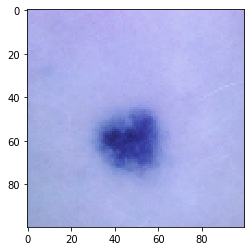

In [8]:
plt.imshow(training_data[1][0])
plt.show()

In [9]:
training_data[1][0].shape

(100, 100, 3)

In [10]:
x=[]
y=[]

In [11]:
for features,labels in training_data:
    x.append(features)
    y.append(labels)

# x=np.array(x).reshape(-1,img_size,img_size,1)

In [12]:
x=np.array(x)

In [13]:
x.shape

(2396, 100, 100, 3)

In [14]:
X=x/255.0

In [15]:
y

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,


In [16]:
X.shape[1:]

(100, 100, 3)

In [17]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

In [18]:
opt=Adam(learning_rate=0.0005)

In [19]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64,kernel_initializer='normal'))
model.add(Activation('relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



# model = Sequential()


# model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.4))

# model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(128, activation='relu', kernel_initializer='normal'))

# model.add(Dense(1, activation='sigmoid'))

# model.summary()

# model.compile(loss='binary_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])



learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5, min_lr=1e-24)


epochs = 40
batch_size = 64



history = model.fit(X, y, validation_split=0.3,epochs= epochs, batch_size= batch_size, verbose=0, callbacks=[learning_rate_reduction])



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00033: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.


In [21]:
model.save('skinmodellatest3')

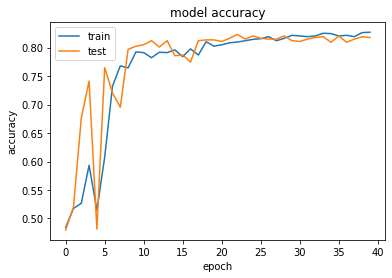

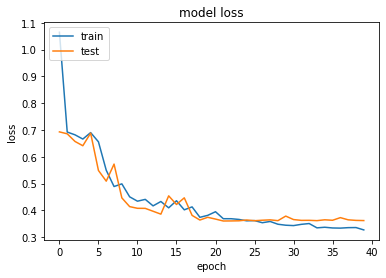

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [88]:
kfold = KFold(n_splits=3, shuffle=True, random_state=10)

In [89]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
opt=Adam(learning_rate=0.0005)

In [ ]:

epochs = 40
batch_size = 128
X=np.array(X)
y=np.array(y)
cvscores = []
for train, test in kfold.split(X, y):
    print(train)
    model = Sequential()

    model.add(Conv2D(256, (3, 3), input_shape=(100,100,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.1))

    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.1))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

    model.add(Dense(128,kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.1))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])


    


    
    model.fit(X, y, validation_split=0.3,epochs= epochs, batch_size= batch_size, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    tf.keras.backend.clear_session()
 
    del model
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


[   0    2    3 ... 2392 2394 2395]


In [22]:
new_mod=tf.keras.models.load_model(r'C:\Users\Hargun\Desktop\cancguip2\skinmodellatest3')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
x=cv2.resize(cv2.imread(r'D:\skcanc\train\0\100.jpg'),(100,100))

In [24]:
x.shape

(100, 100, 3)

In [25]:
x=x.reshape((1,100,100,3))

In [26]:
x.shape

(1, 100, 100, 3)

In [27]:
X=x/255

In [28]:
new_mod.predict(X)[0][0]

0.53276825

In [29]:
pb=r'D:\skcanc\train\0'

In [30]:
pb[16:17]

'0'

In [31]:
predictlist=[]
for i in glob.glob(r'D:\skcanc\train\*'):
    for j in glob.glob(i+'\\'+'*'):
        print(j)
        x=cv2.resize(cv2.imread(j),(100,100))
        x=x.reshape(1,100,100,3)
        X=x/255
        pval=new_mod.predict(X)[0][0]
        predictlist.append([i[16:17],pval])

D:\skcanc\train\0\100.jpg
D:\skcanc\train\0\1000.jpg
D:\skcanc\train\0\1001.jpg
D:\skcanc\train\0\1002.jpg
D:\skcanc\train\0\1004.jpg
D:\skcanc\train\0\1005.jpg
D:\skcanc\train\0\1007.jpg
D:\skcanc\train\0\1008.jpg
D:\skcanc\train\0\1009.jpg
D:\skcanc\train\0\101.jpg
D:\skcanc\train\0\1010.jpg
D:\skcanc\train\0\1011.jpg
D:\skcanc\train\0\1012.jpg
D:\skcanc\train\0\1014.jpg
D:\skcanc\train\0\1015.jpg
D:\skcanc\train\0\1016.jpg
D:\skcanc\train\0\1017.jpg
D:\skcanc\train\0\102.jpg
D:\skcanc\train\0\1020.jpg
D:\skcanc\train\0\1021.jpg
D:\skcanc\train\0\1022.jpg
D:\skcanc\train\0\1024.jpg
D:\skcanc\train\0\1026.jpg
D:\skcanc\train\0\1027.jpg
D:\skcanc\train\0\1028.jpg
D:\skcanc\train\0\103.jpg
D:\skcanc\train\0\1030.jpg
D:\skcanc\train\0\1031.jpg
D:\skcanc\train\0\1032.jpg
D:\skcanc\train\0\1035.jpg
D:\skcanc\train\0\1036.jpg
D:\skcanc\train\0\1037.jpg
D:\skcanc\train\0\1038.jpg
D:\skcanc\train\0\1039.jpg
D:\skcanc\train\0\104.jpg
D:\skcanc\train\0\1040.jpg
D:\skcanc\train\0\1041.jpg
D:\skc

D:\skcanc\train\0\1346.jpg
D:\skcanc\train\0\1347.jpg
D:\skcanc\train\0\1348.jpg
D:\skcanc\train\0\1349.jpg
D:\skcanc\train\0\135.jpg
D:\skcanc\train\0\1351.jpg
D:\skcanc\train\0\1352.jpg
D:\skcanc\train\0\1353.jpg
D:\skcanc\train\0\1355.jpg
D:\skcanc\train\0\1356.jpg
D:\skcanc\train\0\1358.jpg
D:\skcanc\train\0\136.jpg
D:\skcanc\train\0\1360.jpg
D:\skcanc\train\0\1361.jpg
D:\skcanc\train\0\1363.jpg
D:\skcanc\train\0\1364.jpg
D:\skcanc\train\0\1366.jpg
D:\skcanc\train\0\1368.jpg
D:\skcanc\train\0\1369.jpg
D:\skcanc\train\0\137.jpg
D:\skcanc\train\0\1370.jpg
D:\skcanc\train\0\1371.jpg
D:\skcanc\train\0\1372.jpg
D:\skcanc\train\0\1374.jpg
D:\skcanc\train\0\1375.jpg
D:\skcanc\train\0\1379.jpg
D:\skcanc\train\0\138.jpg
D:\skcanc\train\0\1380.jpg
D:\skcanc\train\0\1382.jpg
D:\skcanc\train\0\1383.jpg
D:\skcanc\train\0\1384.jpg
D:\skcanc\train\0\1385.jpg
D:\skcanc\train\0\1386.jpg
D:\skcanc\train\0\1387.jpg
D:\skcanc\train\0\1388.jpg
D:\skcanc\train\0\1389.jpg
D:\skcanc\train\0\139.jpg
D:\skc

D:\skcanc\train\0\338.jpg
D:\skcanc\train\0\339.jpg
D:\skcanc\train\0\34.jpg
D:\skcanc\train\0\340.jpg
D:\skcanc\train\0\341.jpg
D:\skcanc\train\0\342.jpg
D:\skcanc\train\0\343.jpg
D:\skcanc\train\0\345.jpg
D:\skcanc\train\0\346.jpg
D:\skcanc\train\0\347.jpg
D:\skcanc\train\0\349.jpg
D:\skcanc\train\0\35.jpg
D:\skcanc\train\0\350.jpg
D:\skcanc\train\0\351.jpg
D:\skcanc\train\0\352.jpg
D:\skcanc\train\0\353.jpg
D:\skcanc\train\0\355.jpg
D:\skcanc\train\0\357.jpg
D:\skcanc\train\0\358.jpg
D:\skcanc\train\0\359.jpg
D:\skcanc\train\0\36.jpg
D:\skcanc\train\0\360.jpg
D:\skcanc\train\0\361.jpg
D:\skcanc\train\0\362.jpg
D:\skcanc\train\0\363.jpg
D:\skcanc\train\0\364.jpg
D:\skcanc\train\0\365.jpg
D:\skcanc\train\0\366.jpg
D:\skcanc\train\0\368.jpg
D:\skcanc\train\0\370.jpg
D:\skcanc\train\0\371.jpg
D:\skcanc\train\0\372.jpg
D:\skcanc\train\0\373.jpg
D:\skcanc\train\0\374.jpg
D:\skcanc\train\0\375.jpg
D:\skcanc\train\0\376.jpg
D:\skcanc\train\0\377.jpg
D:\skcanc\train\0\38.jpg
D:\skcanc\train\

D:\skcanc\train\0\698.jpg
D:\skcanc\train\0\699.jpg
D:\skcanc\train\0\7.jpg
D:\skcanc\train\0\70.jpg
D:\skcanc\train\0\701.jpg
D:\skcanc\train\0\702.jpg
D:\skcanc\train\0\703.jpg
D:\skcanc\train\0\704.jpg
D:\skcanc\train\0\705.jpg
D:\skcanc\train\0\706.jpg
D:\skcanc\train\0\707.jpg
D:\skcanc\train\0\708.jpg
D:\skcanc\train\0\709.jpg
D:\skcanc\train\0\710.jpg
D:\skcanc\train\0\711.jpg
D:\skcanc\train\0\713.jpg
D:\skcanc\train\0\714.jpg
D:\skcanc\train\0\715.jpg
D:\skcanc\train\0\716.jpg
D:\skcanc\train\0\718.jpg
D:\skcanc\train\0\719.jpg
D:\skcanc\train\0\72.jpg
D:\skcanc\train\0\722.jpg
D:\skcanc\train\0\723.jpg
D:\skcanc\train\0\726.jpg
D:\skcanc\train\0\727.jpg
D:\skcanc\train\0\728.jpg
D:\skcanc\train\0\729.jpg
D:\skcanc\train\0\73.jpg
D:\skcanc\train\0\730.jpg
D:\skcanc\train\0\731.jpg
D:\skcanc\train\0\732.jpg
D:\skcanc\train\0\733.jpg
D:\skcanc\train\0\734.jpg
D:\skcanc\train\0\735.jpg
D:\skcanc\train\0\736.jpg
D:\skcanc\train\0\737.jpg
D:\skcanc\train\0\738.jpg
D:\skcanc\train\0

D:\skcanc\train\1\1059.jpg
D:\skcanc\train\1\106.jpg
D:\skcanc\train\1\1060.jpg
D:\skcanc\train\1\1061.jpg
D:\skcanc\train\1\1062.jpg
D:\skcanc\train\1\1063.jpg
D:\skcanc\train\1\1064.jpg
D:\skcanc\train\1\1066.jpg
D:\skcanc\train\1\1067.jpg
D:\skcanc\train\1\1068.jpg
D:\skcanc\train\1\1069.jpg
D:\skcanc\train\1\107.jpg
D:\skcanc\train\1\1070.jpg
D:\skcanc\train\1\1071.jpg
D:\skcanc\train\1\1072.jpg
D:\skcanc\train\1\1073.jpg
D:\skcanc\train\1\1075.jpg
D:\skcanc\train\1\1076.jpg
D:\skcanc\train\1\1077.jpg
D:\skcanc\train\1\1078.jpg
D:\skcanc\train\1\1079.jpg
D:\skcanc\train\1\108.jpg
D:\skcanc\train\1\1081.jpg
D:\skcanc\train\1\1082.jpg
D:\skcanc\train\1\1084.jpg
D:\skcanc\train\1\1085.jpg
D:\skcanc\train\1\1086.jpg
D:\skcanc\train\1\1087.jpg
D:\skcanc\train\1\1088.jpg
D:\skcanc\train\1\109.jpg
D:\skcanc\train\1\1090.jpg
D:\skcanc\train\1\1092.jpg
D:\skcanc\train\1\1093.jpg
D:\skcanc\train\1\1095.jpg
D:\skcanc\train\1\1096.jpg
D:\skcanc\train\1\1097.jpg
D:\skcanc\train\1\1098.jpg
D:\sk

D:\skcanc\train\1\1411.jpg
D:\skcanc\train\1\1412.jpg
D:\skcanc\train\1\1413.jpg
D:\skcanc\train\1\1414.jpg
D:\skcanc\train\1\1415.jpg
D:\skcanc\train\1\1416.jpg
D:\skcanc\train\1\1418.jpg
D:\skcanc\train\1\1419.jpg
D:\skcanc\train\1\142.jpg
D:\skcanc\train\1\1420.jpg
D:\skcanc\train\1\1421.jpg
D:\skcanc\train\1\1423.jpg
D:\skcanc\train\1\1424.jpg
D:\skcanc\train\1\1426.jpg
D:\skcanc\train\1\1428.jpg
D:\skcanc\train\1\1429.jpg
D:\skcanc\train\1\143.jpg
D:\skcanc\train\1\1431.jpg
D:\skcanc\train\1\1432.jpg
D:\skcanc\train\1\1433.jpg
D:\skcanc\train\1\1434.jpg
D:\skcanc\train\1\1435.jpg
D:\skcanc\train\1\1437.jpg
D:\skcanc\train\1\1439.jpg
D:\skcanc\train\1\144.jpg
D:\skcanc\train\1\1440.jpg
D:\skcanc\train\1\1441.jpg
D:\skcanc\train\1\1442.jpg
D:\skcanc\train\1\1444.jpg
D:\skcanc\train\1\1445.jpg
D:\skcanc\train\1\1446.jpg
D:\skcanc\train\1\1448.jpg
D:\skcanc\train\1\1449.jpg
D:\skcanc\train\1\145.jpg
D:\skcanc\train\1\1450.jpg
D:\skcanc\train\1\1452.jpg
D:\skcanc\train\1\1453.jpg
D:\sk

D:\skcanc\train\1\411.jpg
D:\skcanc\train\1\412.jpg
D:\skcanc\train\1\413.jpg
D:\skcanc\train\1\414.jpg
D:\skcanc\train\1\415.jpg
D:\skcanc\train\1\416.jpg
D:\skcanc\train\1\417.jpg
D:\skcanc\train\1\418.jpg
D:\skcanc\train\1\42.jpg
D:\skcanc\train\1\420.jpg
D:\skcanc\train\1\422.jpg
D:\skcanc\train\1\423.jpg
D:\skcanc\train\1\425.jpg
D:\skcanc\train\1\427.jpg
D:\skcanc\train\1\429.jpg
D:\skcanc\train\1\43.jpg
D:\skcanc\train\1\431.jpg
D:\skcanc\train\1\432.jpg
D:\skcanc\train\1\433.jpg
D:\skcanc\train\1\434.jpg
D:\skcanc\train\1\435.jpg
D:\skcanc\train\1\438.jpg
D:\skcanc\train\1\439.jpg
D:\skcanc\train\1\440.jpg
D:\skcanc\train\1\441.jpg
D:\skcanc\train\1\442.jpg
D:\skcanc\train\1\443.jpg
D:\skcanc\train\1\444.jpg
D:\skcanc\train\1\446.jpg
D:\skcanc\train\1\447.jpg
D:\skcanc\train\1\448.jpg
D:\skcanc\train\1\449.jpg
D:\skcanc\train\1\45.jpg
D:\skcanc\train\1\451.jpg
D:\skcanc\train\1\452.jpg
D:\skcanc\train\1\453.jpg
D:\skcanc\train\1\454.jpg
D:\skcanc\train\1\455.jpg
D:\skcanc\train

D:\skcanc\train\1\770.jpg
D:\skcanc\train\1\772.jpg
D:\skcanc\train\1\774.jpg
D:\skcanc\train\1\775.jpg
D:\skcanc\train\1\777.jpg
D:\skcanc\train\1\779.jpg
D:\skcanc\train\1\78.jpg
D:\skcanc\train\1\780.jpg
D:\skcanc\train\1\781.jpg
D:\skcanc\train\1\782.jpg
D:\skcanc\train\1\783.jpg
D:\skcanc\train\1\784.jpg
D:\skcanc\train\1\785.jpg
D:\skcanc\train\1\786.jpg
D:\skcanc\train\1\787.jpg
D:\skcanc\train\1\789.jpg
D:\skcanc\train\1\79.jpg
D:\skcanc\train\1\790.jpg
D:\skcanc\train\1\791.jpg
D:\skcanc\train\1\793.jpg
D:\skcanc\train\1\795.jpg
D:\skcanc\train\1\796.jpg
D:\skcanc\train\1\798.jpg
D:\skcanc\train\1\799.jpg
D:\skcanc\train\1\80.jpg
D:\skcanc\train\1\800.jpg
D:\skcanc\train\1\801.jpg
D:\skcanc\train\1\802.jpg
D:\skcanc\train\1\803.jpg
D:\skcanc\train\1\805.jpg
D:\skcanc\train\1\806.jpg
D:\skcanc\train\1\807.jpg
D:\skcanc\train\1\809.jpg
D:\skcanc\train\1\810.jpg
D:\skcanc\train\1\811.jpg
D:\skcanc\train\1\812.jpg
D:\skcanc\train\1\813.jpg
D:\skcanc\train\1\814.jpg
D:\skcanc\train

In [32]:
predictlist

[['0', 0.40938908],
 ['0', 0.004266652],
 ['0', 0.013233571],
 ['0', 0.26095626],
 ['0', 0.0032547817],
 ['0', 0.069665305],
 ['0', 0.015590042],
 ['0', 0.36591867],
 ['0', 0.024992663],
 ['0', 0.013313579],
 ['0', 0.0029501014],
 ['0', 0.0020979533],
 ['0', 0.011920721],
 ['0', 0.010109003],
 ['0', 0.009163018],
 ['0', 0.010213507],
 ['0', 0.88435477],
 ['0', 0.03306657],
 ['0', 0.007008085],
 ['0', 0.003126382],
 ['0', 0.014676613],
 ['0', 0.019031653],
 ['0', 0.0073198294],
 ['0', 0.00138884],
 ['0', 0.6469924],
 ['0', 0.003144305],
 ['0', 0.0038604285],
 ['0', 0.15813802],
 ['0', 0.41027656],
 ['0', 0.7564882],
 ['0', 0.044530544],
 ['0', 0.37427476],
 ['0', 0.007822278],
 ['0', 0.09566949],
 ['0', 0.022169033],
 ['0', 0.16848406],
 ['0', 0.007902195],
 ['0', 0.0034315553],
 ['0', 0.0054610716],
 ['0', 0.0072753546],
 ['0', 0.003980368],
 ['0', 0.0049878587],
 ['0', 0.9943052],
 ['0', 0.32265088],
 ['0', 0.0047911434],
 ['0', 0.08865347],
 ['0', 0.0031273167],
 ['0', 0.0043199663],

In [82]:
from tensorflow.keras.applications import ResNet50

In [ ]:
epochs = 50
batch_size = 64
model1= ResNet50(include_top=True,weights= None,input_tensor=None,input_shape=(100,100,3),pooling='avg',classes=1)
model1.compile(optimizer = opt ,loss = "binary_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5, min_lr=1e-24)
history = model1.fit(X, y, validation_split=0.3,epochs= epochs, batch_size= batch_size, verbose=2, callbacks=[learning_rate_reduction])

Train on 1677 samples, validate on 719 samples
Epoch 1/50
1677/1677 - 767s - loss: 7.5889 - acc: 0.5051 - val_loss: 7.8692 - val_acc: 0.4868
Epoch 2/50
1677/1677 - 763s - loss: 7.5889 - acc: 0.5051 - val_loss: 7.8692 - val_acc: 0.4868
Epoch 3/50
1677/1677 - 743s - loss: 7.5889 - acc: 0.5051 - val_loss: 7.8692 - val_acc: 0.4868
Epoch 4/50
